## Jamboree Education

#### **Problem Statement:**
#### Help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves.

#### Complete EDA and Model training experiments and slection of parameters are in this notebook since our data is small, so lot's of things are for learning purpose.

In [1]:
# Reading of dataset.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge, Lasso
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pylab
import missingno as msno # missing data visualization module

In [2]:
import os 
%pwd # check current directory

'/Users/sudhirmalik/Documents/End_to_End_Projects/Jamboree_MLOPS/research'

In [3]:
os.chdir('../') 

In [4]:
%pwd

'/Users/sudhirmalik/Documents/End_to_End_Projects/Jamboree_MLOPS'

In [6]:
# Read the dataset
df = pd.read_csv('artifacts/data_ingestion/Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


***
***
## **1. Analyzing Basic Metrics.**

In [7]:
df = df.drop('Serial No.', axis=1) 

print("Shape:", df.shape, "\n")

print("Data Types:\n", df.dtypes, "\n")

print("Column Names:\n", df.columns, "\n")

print("Null Values:\n", df.isnull().sum(), "\n")

print("Unique Values:\n", df.nunique(), "\n")

Shape: (500, 8) 

Data Types:
 GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object 

Column Names:
 Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object') 

Null Values:
 GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64 

Unique Values:
 GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64 



In [8]:
df.columns = [col.strip() for col in df.columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [10]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### **Univariate analysis** and **heatmap** with **pairplot**

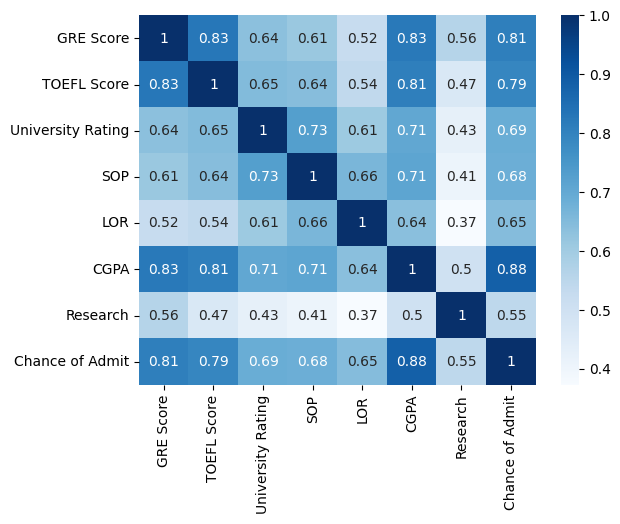

In [11]:
import seaborn as sns
sns.heatmap(df.corr(), cmap= "Blues", annot=True)
plt.show()

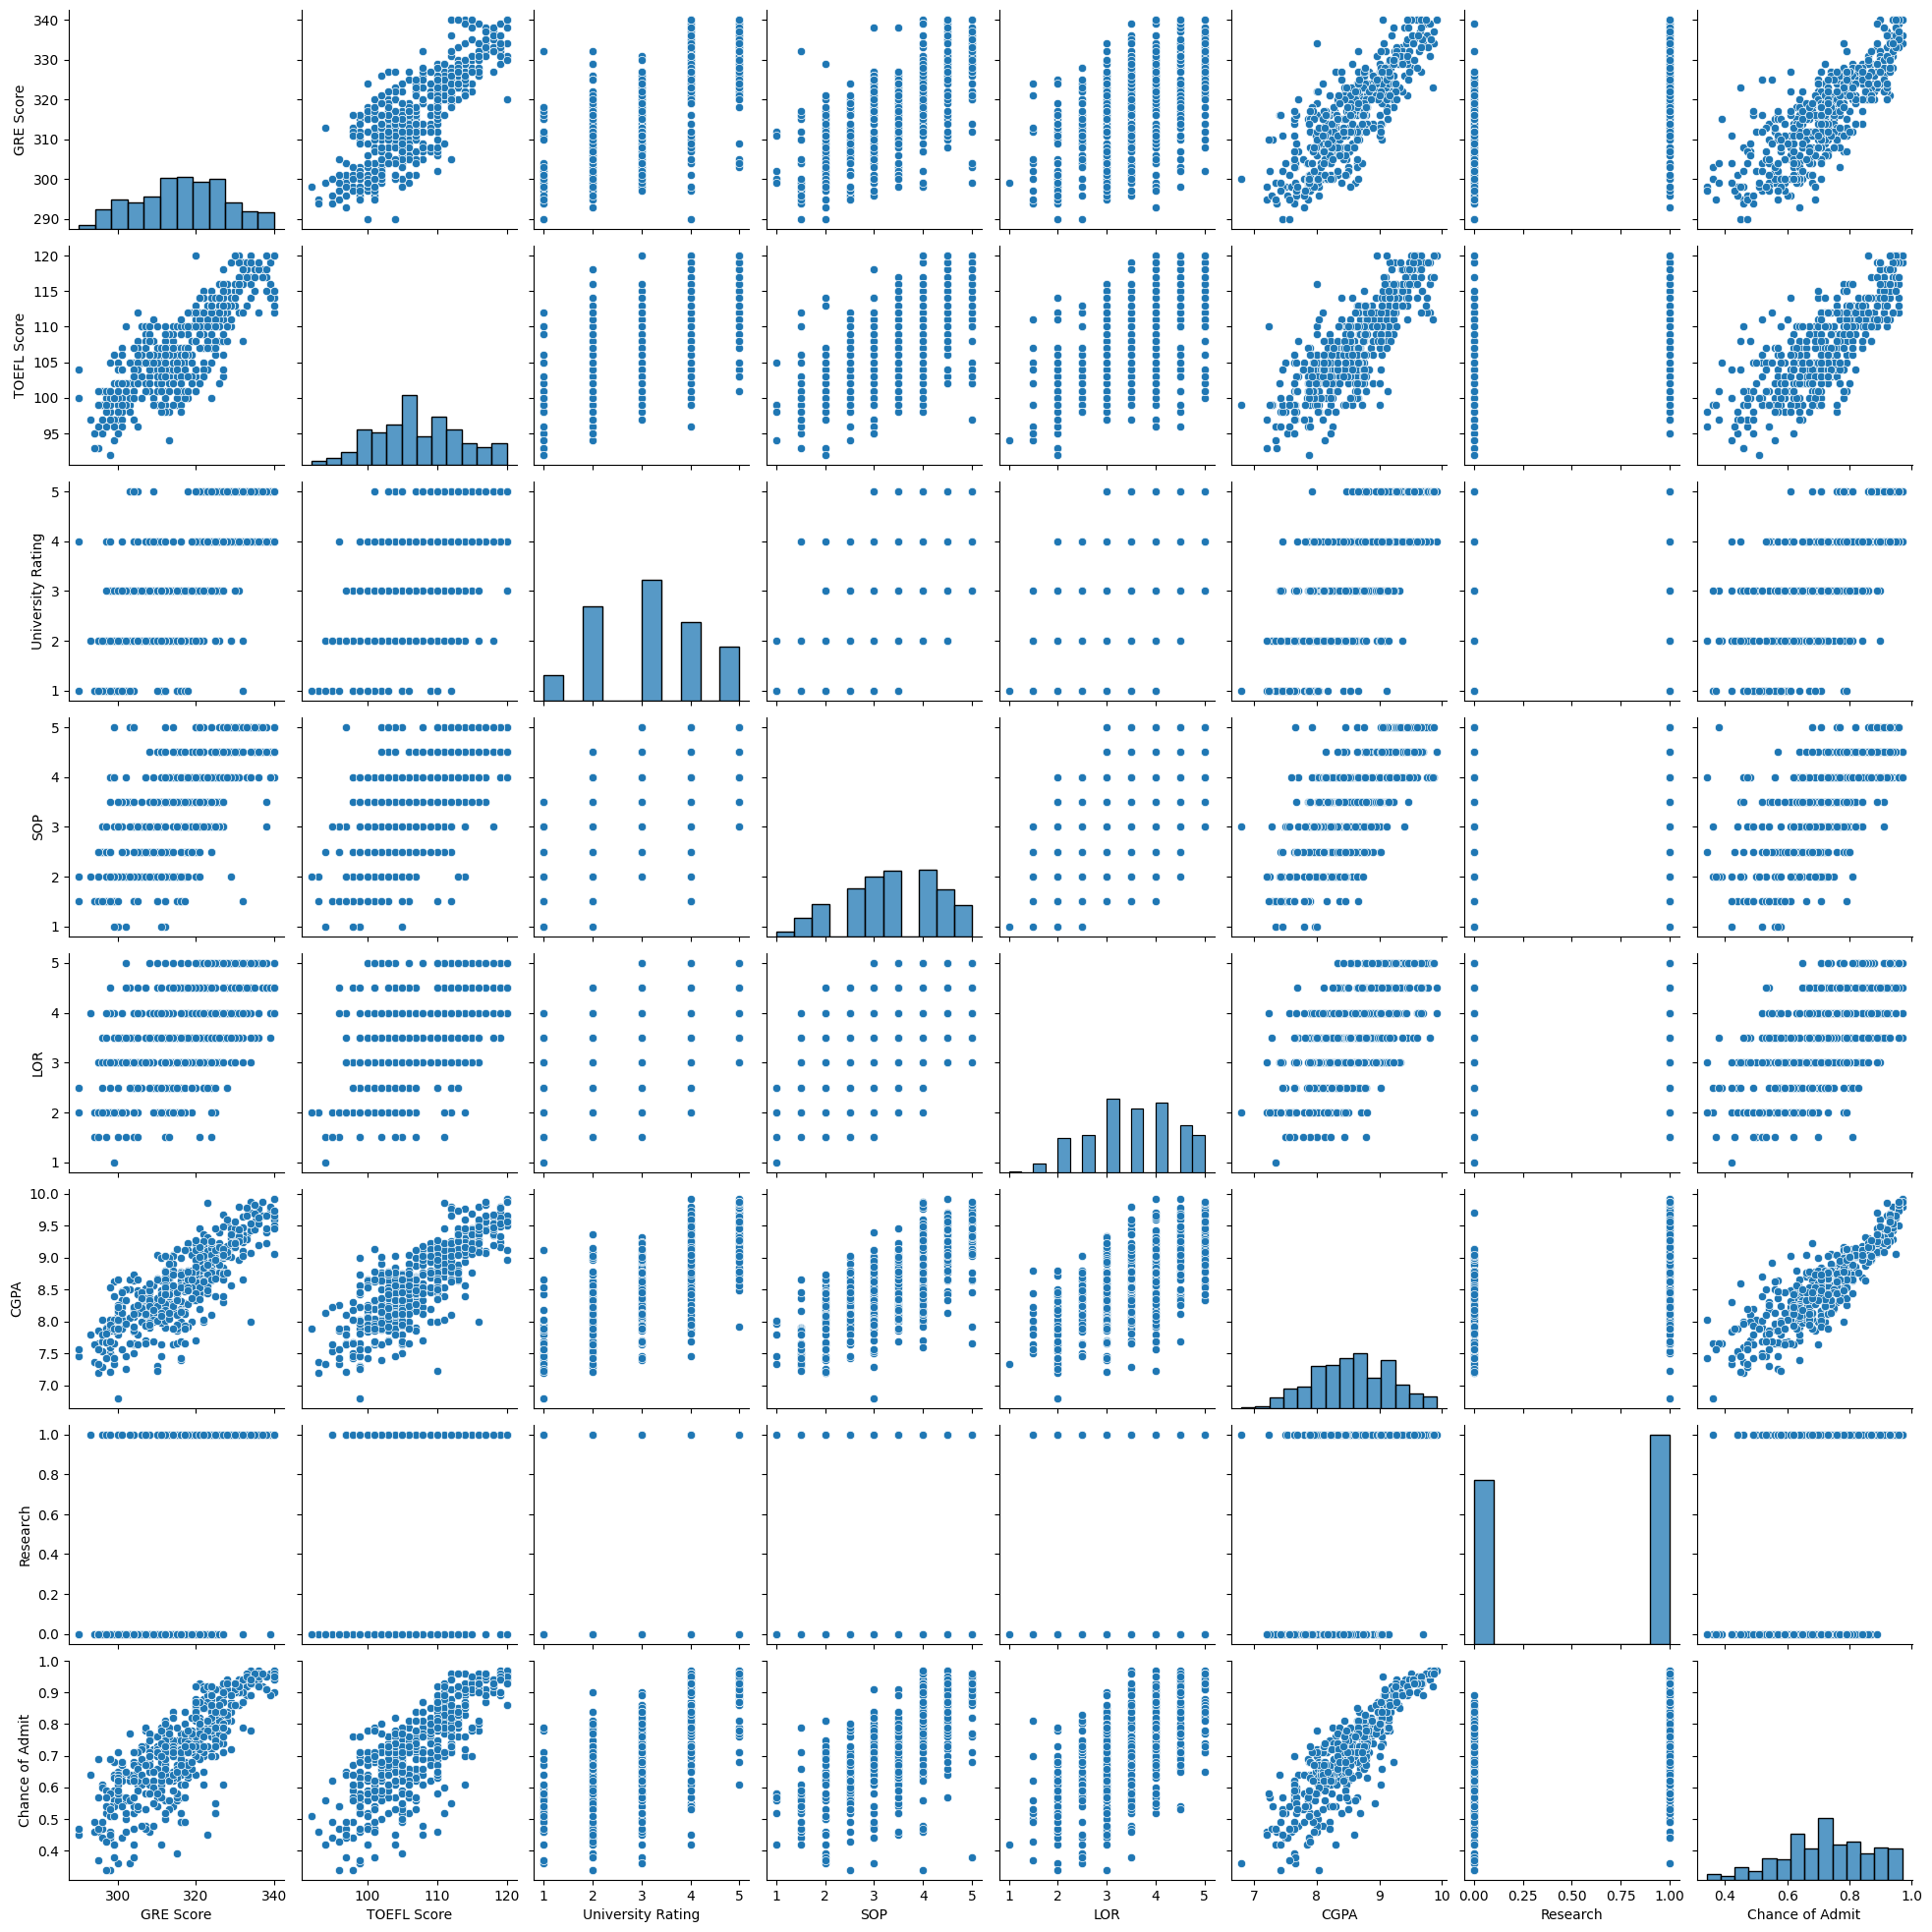

In [12]:
sns.pairplot(data = df)
plt.show()

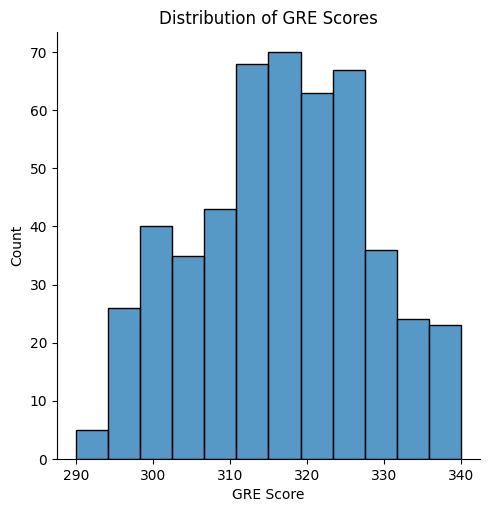

In [13]:
fig = sns.displot(df['GRE Score'])
plt.title("Distribution of GRE Scores")
plt.show()

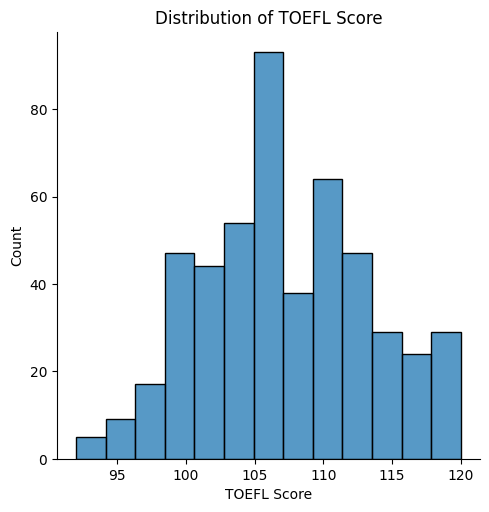

In [14]:
fig = sns.displot(df['TOEFL Score'])
plt.title("Distribution of TOEFL Score")
plt.show()

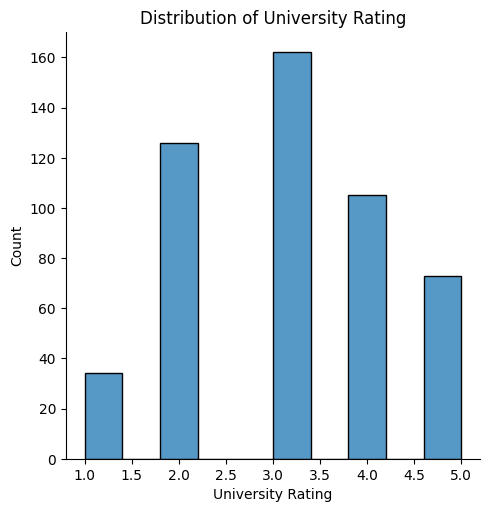

In [15]:
fig = sns.displot(df['University Rating'])
plt.title("Distribution of University Rating")
plt.show()

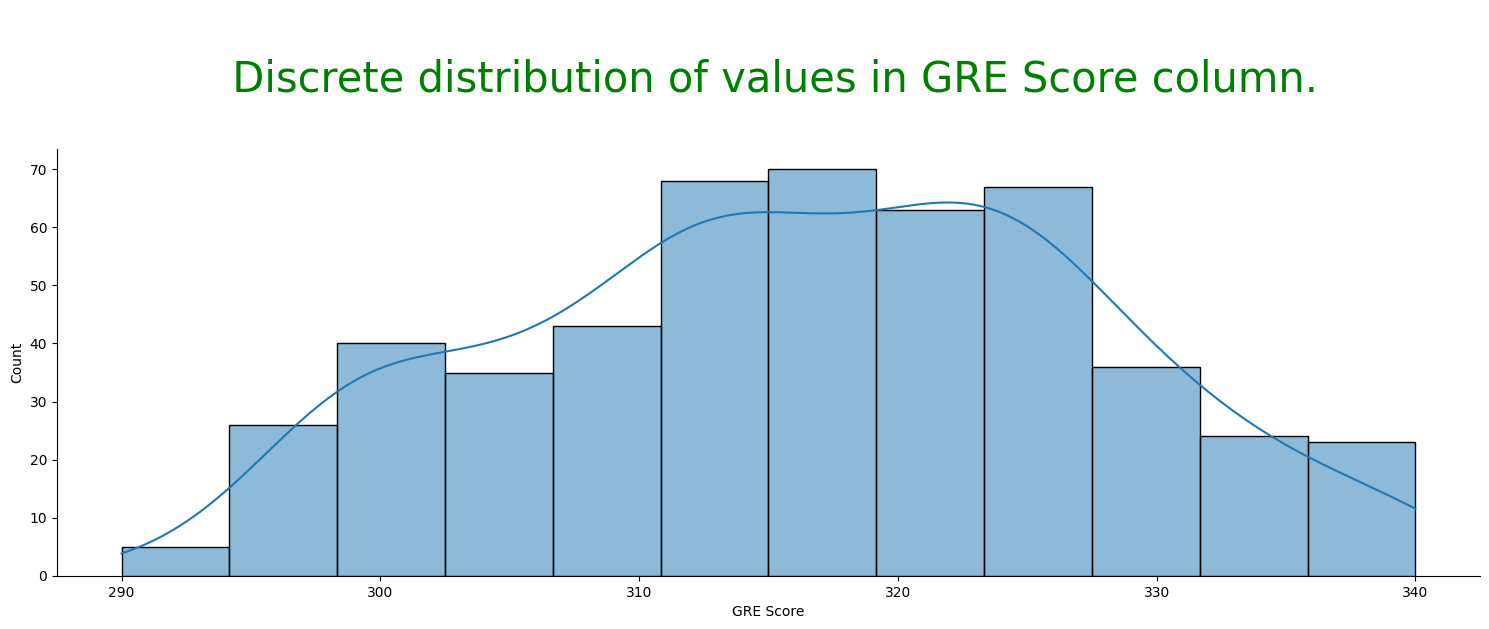

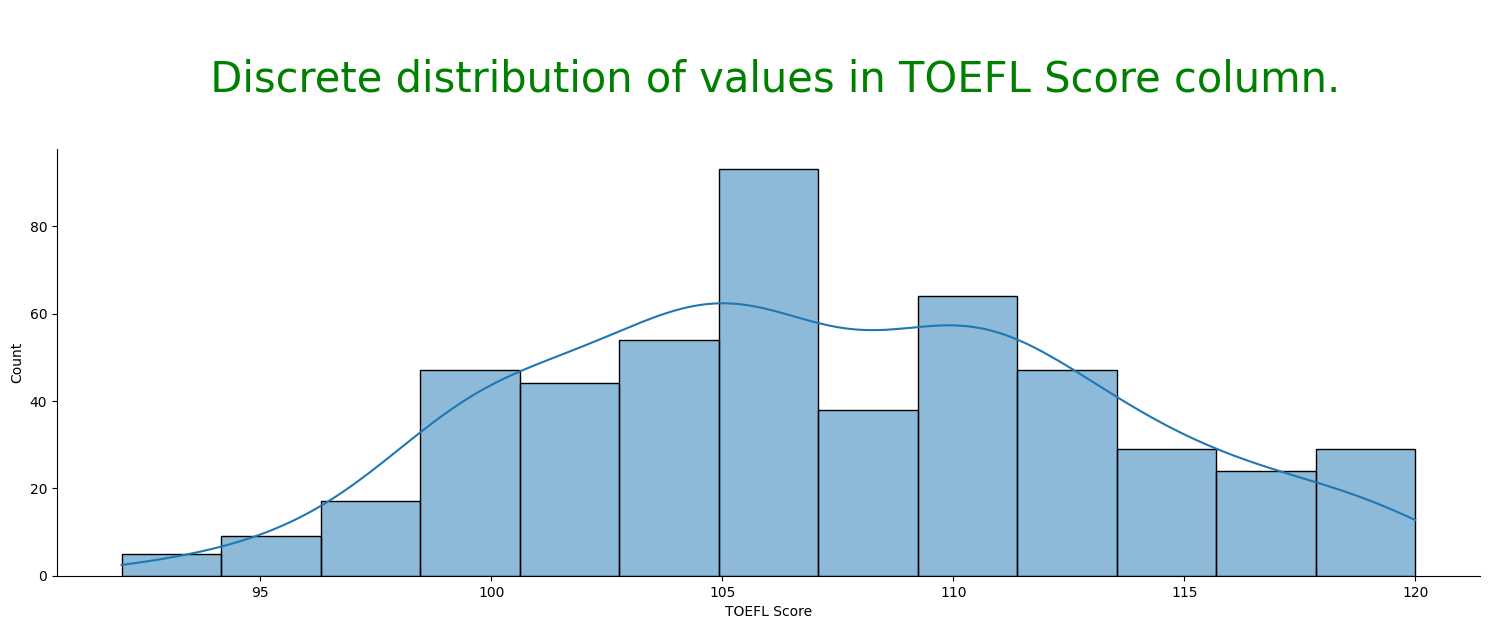

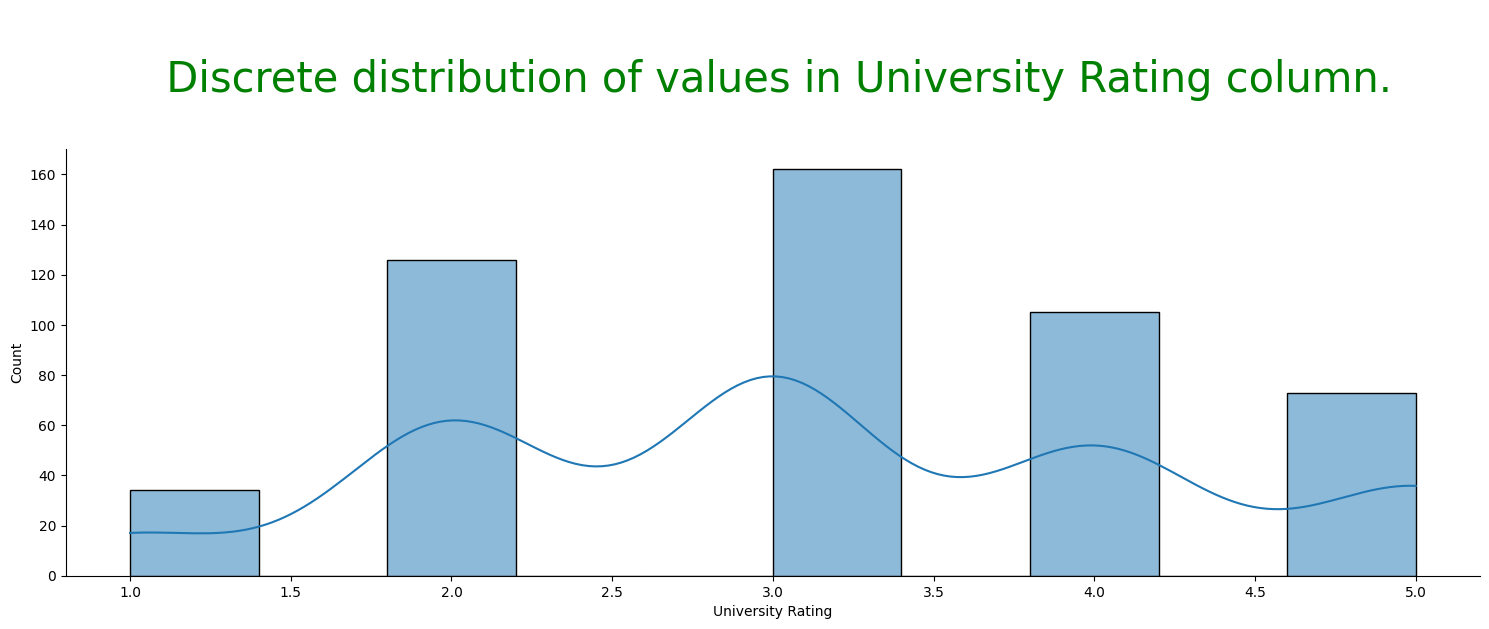

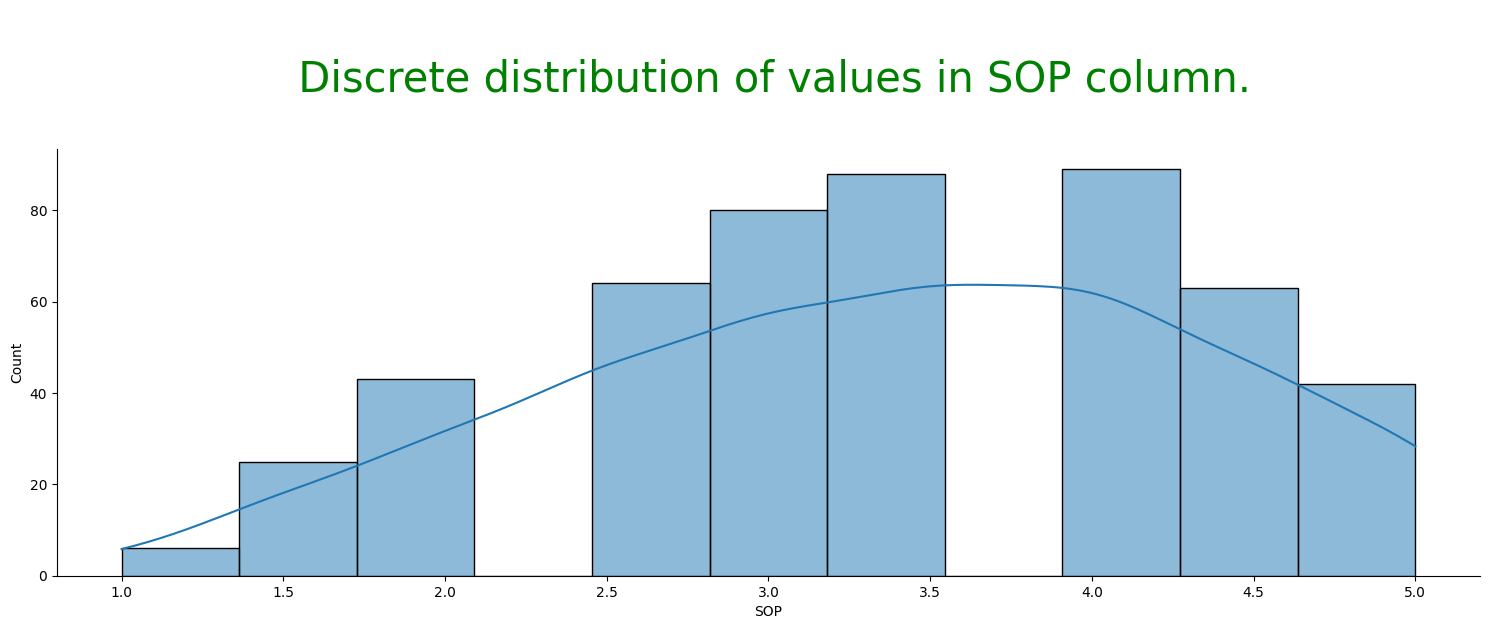

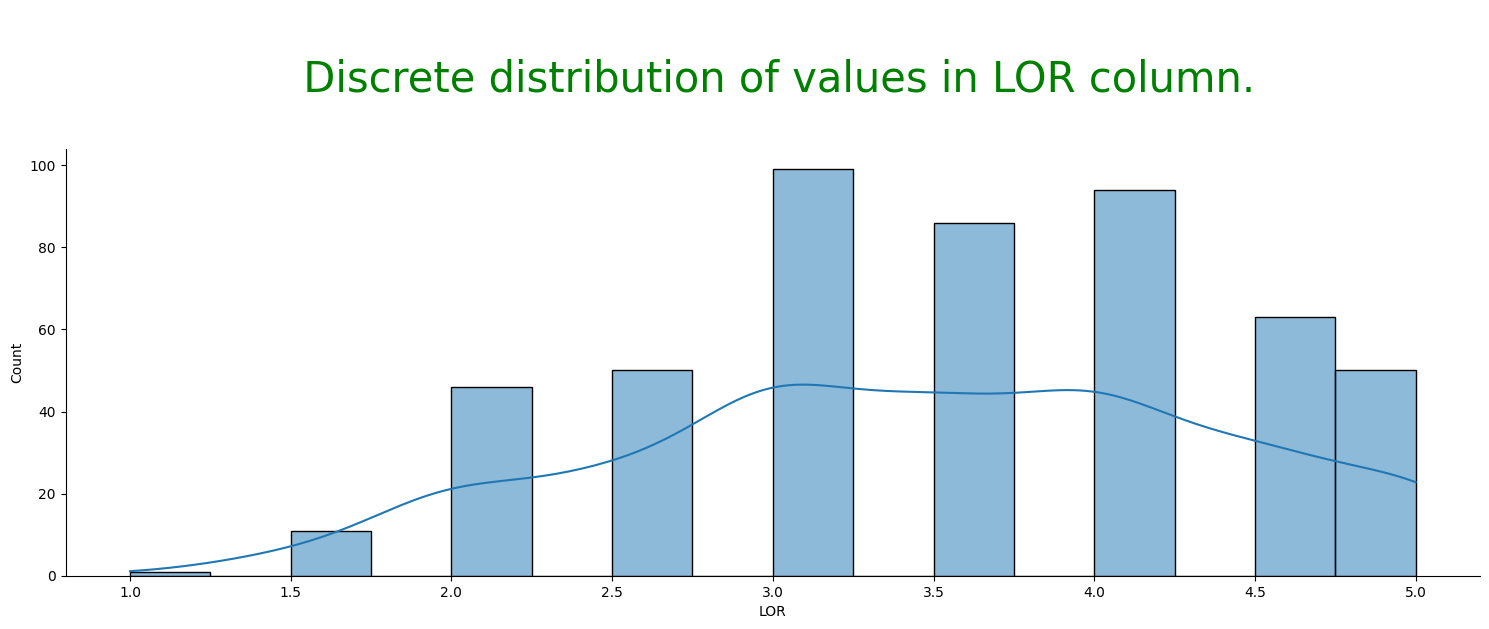

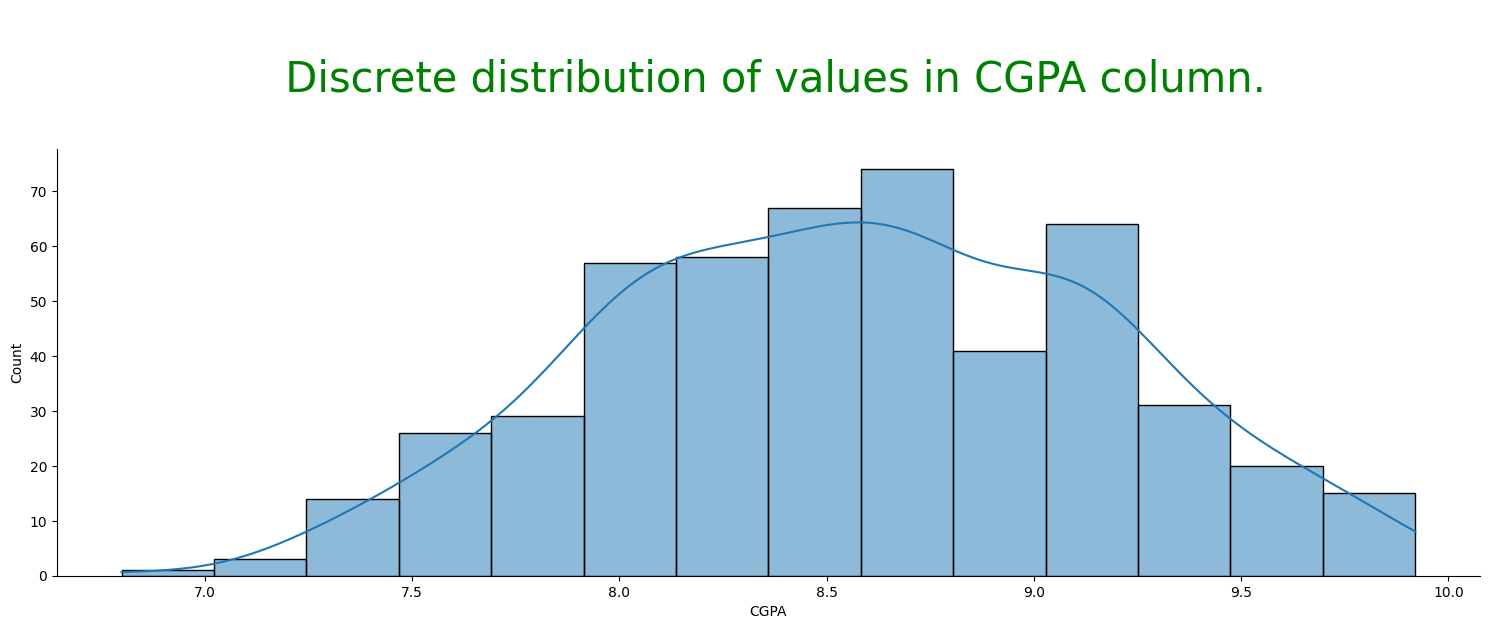

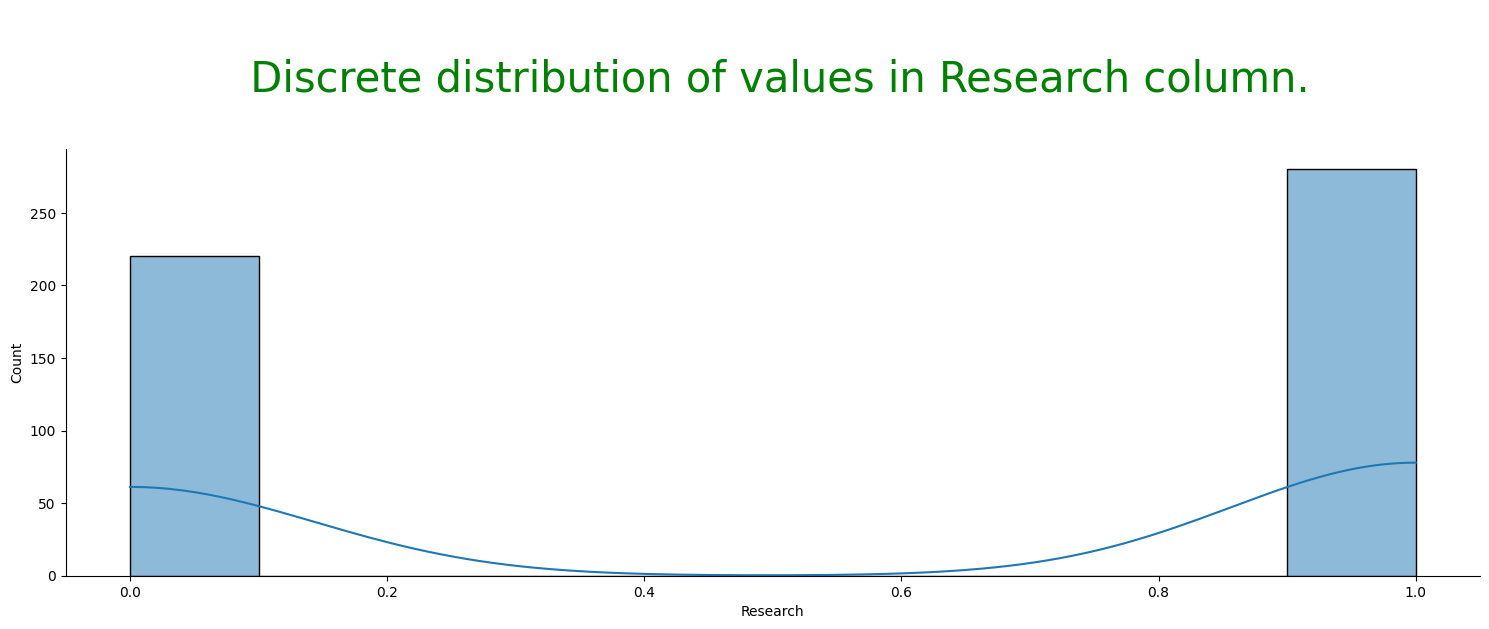

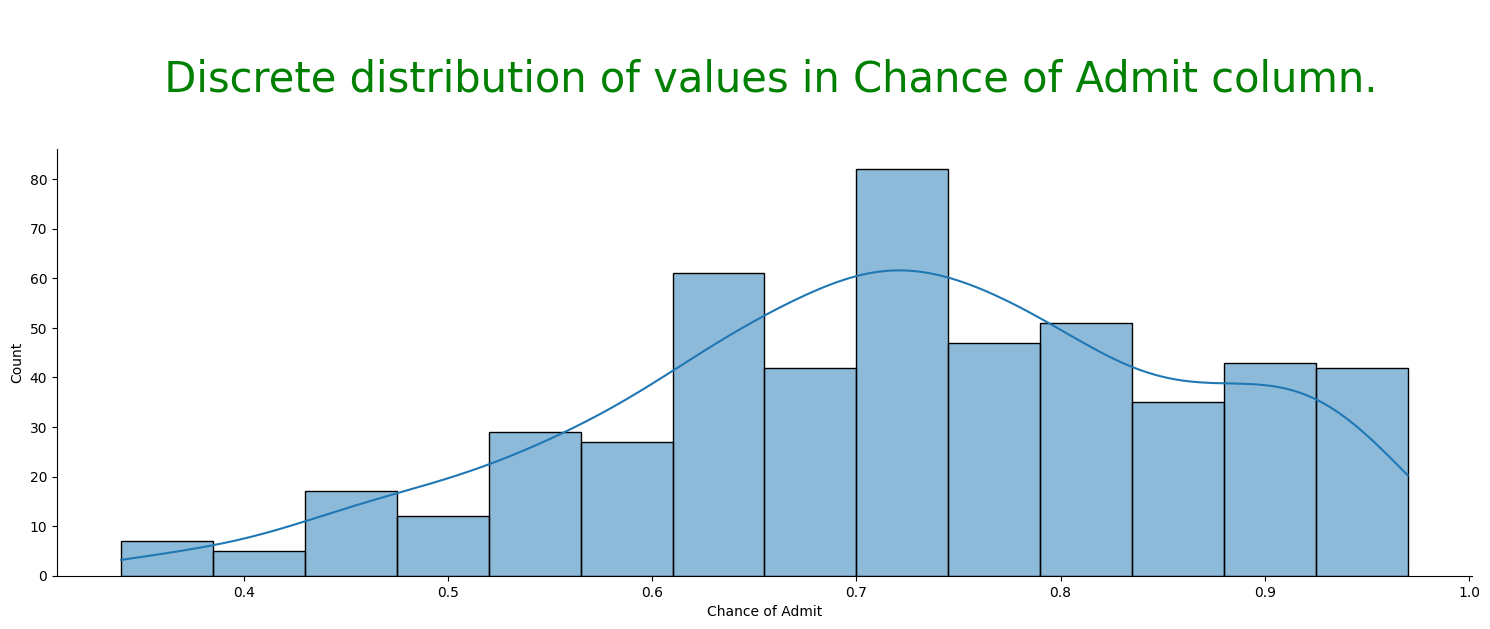

In [27]:
for column in df.columns:
    sns.displot(df[column], kde=True, height=5, aspect=3)
    plt.title(f"\n Discrete distribution of values in {column} column.\n", fontsize=30, color="green")
    plt.show()

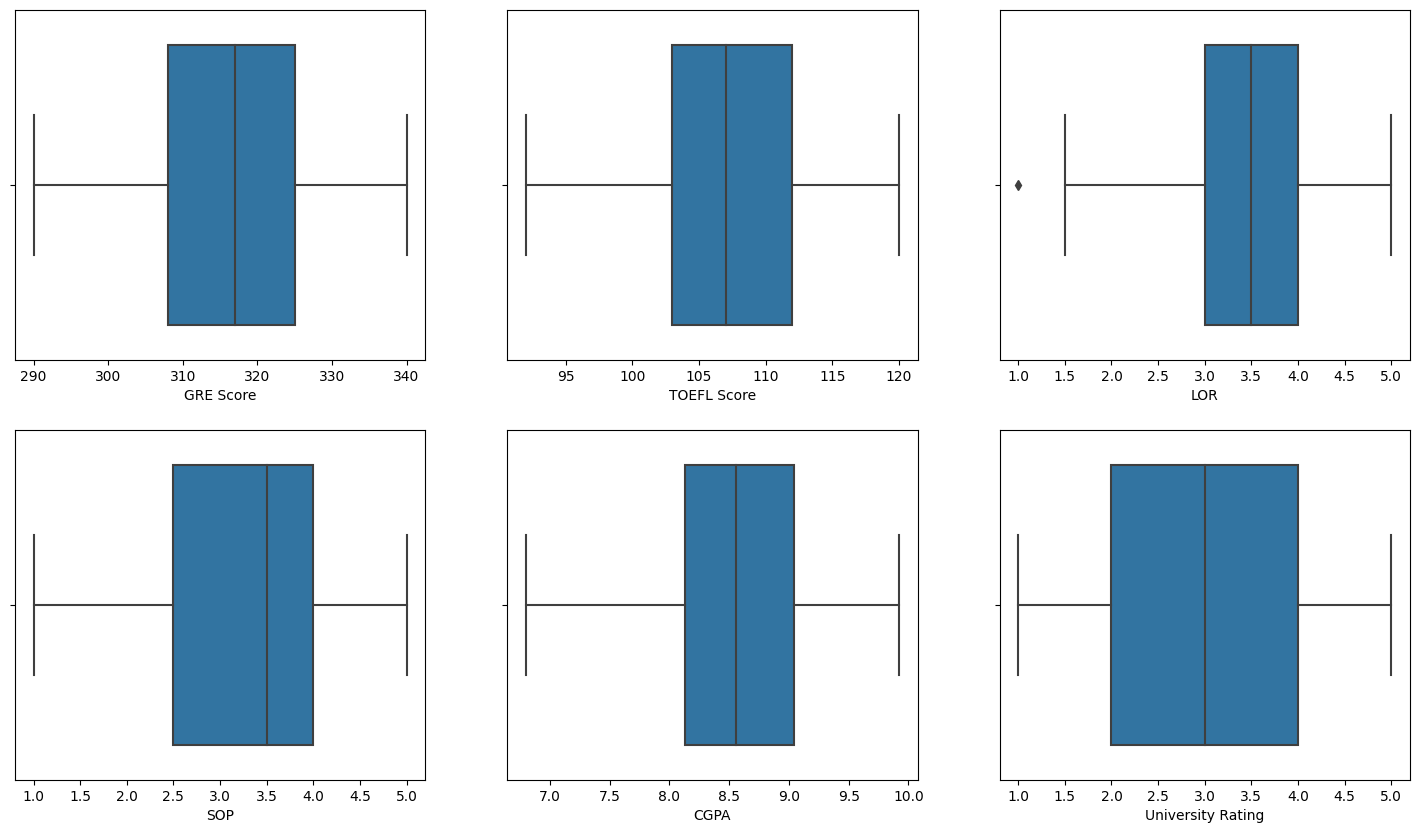

In [26]:
fig, axes = plt.subplots(2, 3, figsize= (18, 10)) 
sns.boxplot(ax=axes[0, 0], data=df, x='GRE Score')
sns.boxplot(ax=axes[0, 1], data=df, x='TOEFL Score')
sns.boxplot(ax=axes[0, 2], data=df, x='LOR')
sns.boxplot(ax=axes[1, 0], data=df, x='SOP')
sns.boxplot(ax=axes[1, 1], data=df, x='CGPA')
sns.boxplot(ax=axes[1, 2], data=df, x='University Rating')

plt.show()

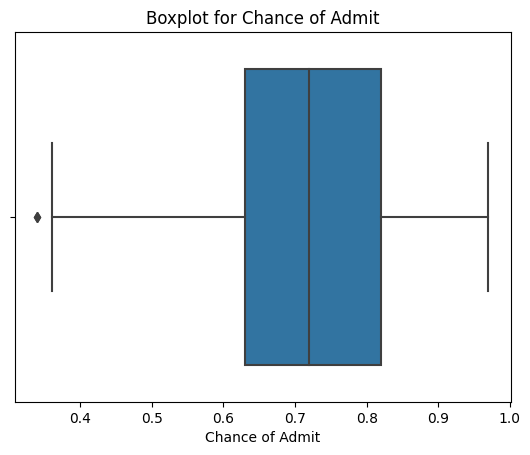

In [23]:
# Boxplot for Chance of Admit

fig = sns.boxplot(x = df['Chance of Admit'])
plt.title("Boxplot for Chance of Admit")
plt.show()

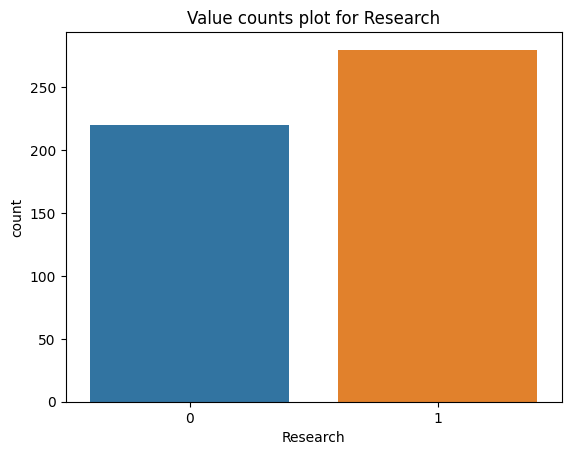

In [24]:
# Value counts plot for Research 

fig = sns.countplot(x = df['Research'])
plt.title("Value counts plot for Research")
plt.show()

In [29]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [31]:
# Convert Research column to categorical
df['Research'] = df['Research'].astype('category')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    int64   
 3   SOP                500 non-null    float64 
 4   LOR                500 non-null    float64 
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    category
 7   Chance of Admit    500 non-null    float64 
dtypes: category(1), float64(4), int64(3)
memory usage: 28.1 KB


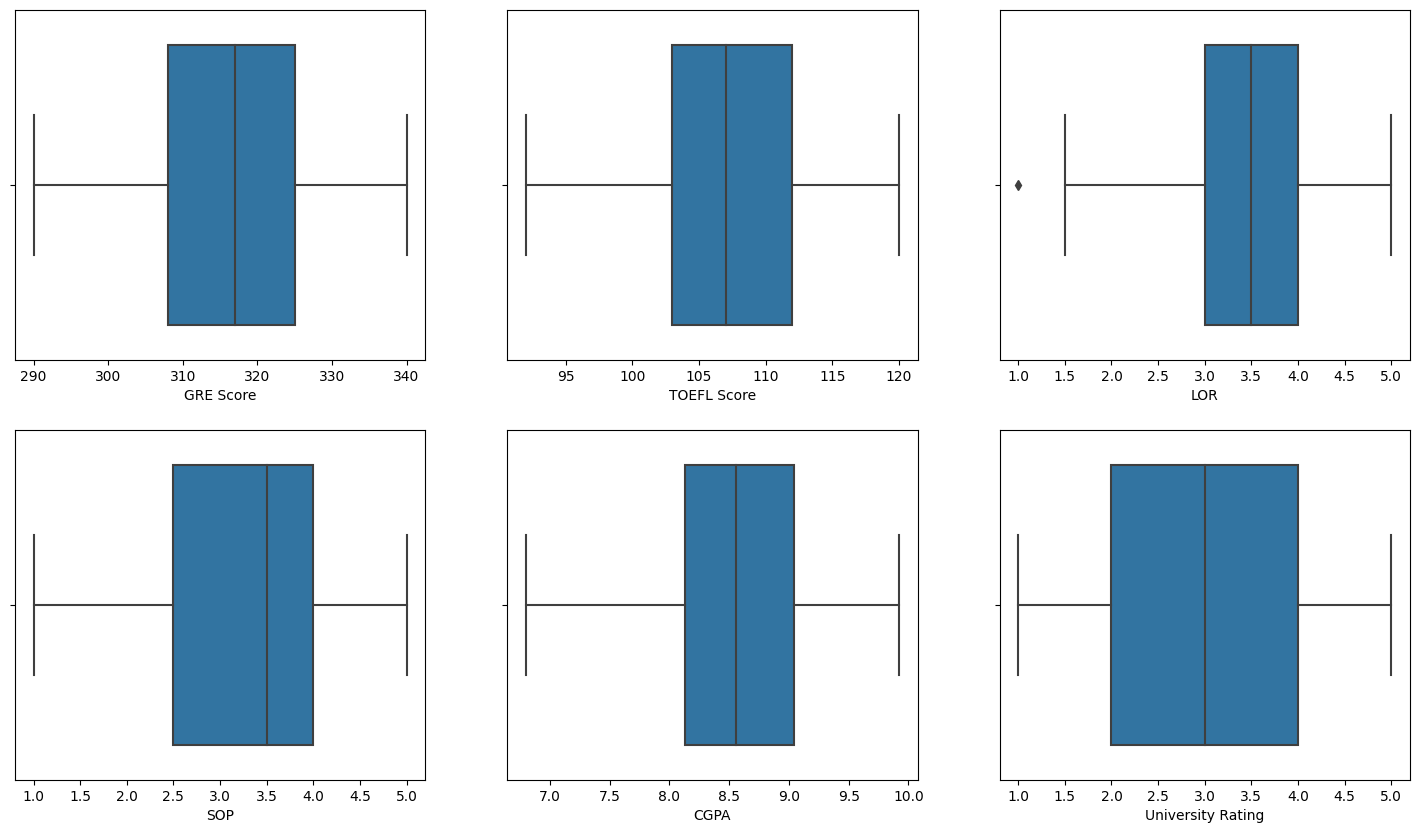

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Research' to categorical if it's not already
df['Research'] = df['Research'].astype('category')

# Specify the order of hue levels
hue_order = df['Research'].cat.categories

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.boxplot(ax=axes[0, 0], data=df, x='GRE Score', hue='Research', hue_order=hue_order)
sns.boxplot(ax=axes[0, 1], data=df, x='TOEFL Score', hue='Research', hue_order=hue_order)
sns.boxplot(ax=axes[0, 2], data=df, x='LOR', hue='Research', hue_order=hue_order)
sns.boxplot(ax=axes[1, 0], data=df, x='SOP', hue='Research', hue_order=hue_order)
sns.boxplot(ax=axes[1, 1], data=df, x='CGPA', hue='Research', hue_order=hue_order)
sns.boxplot(ax=axes[1, 2], data=df, x='University Rating', hue='Research', hue_order=hue_order)

plt.show()


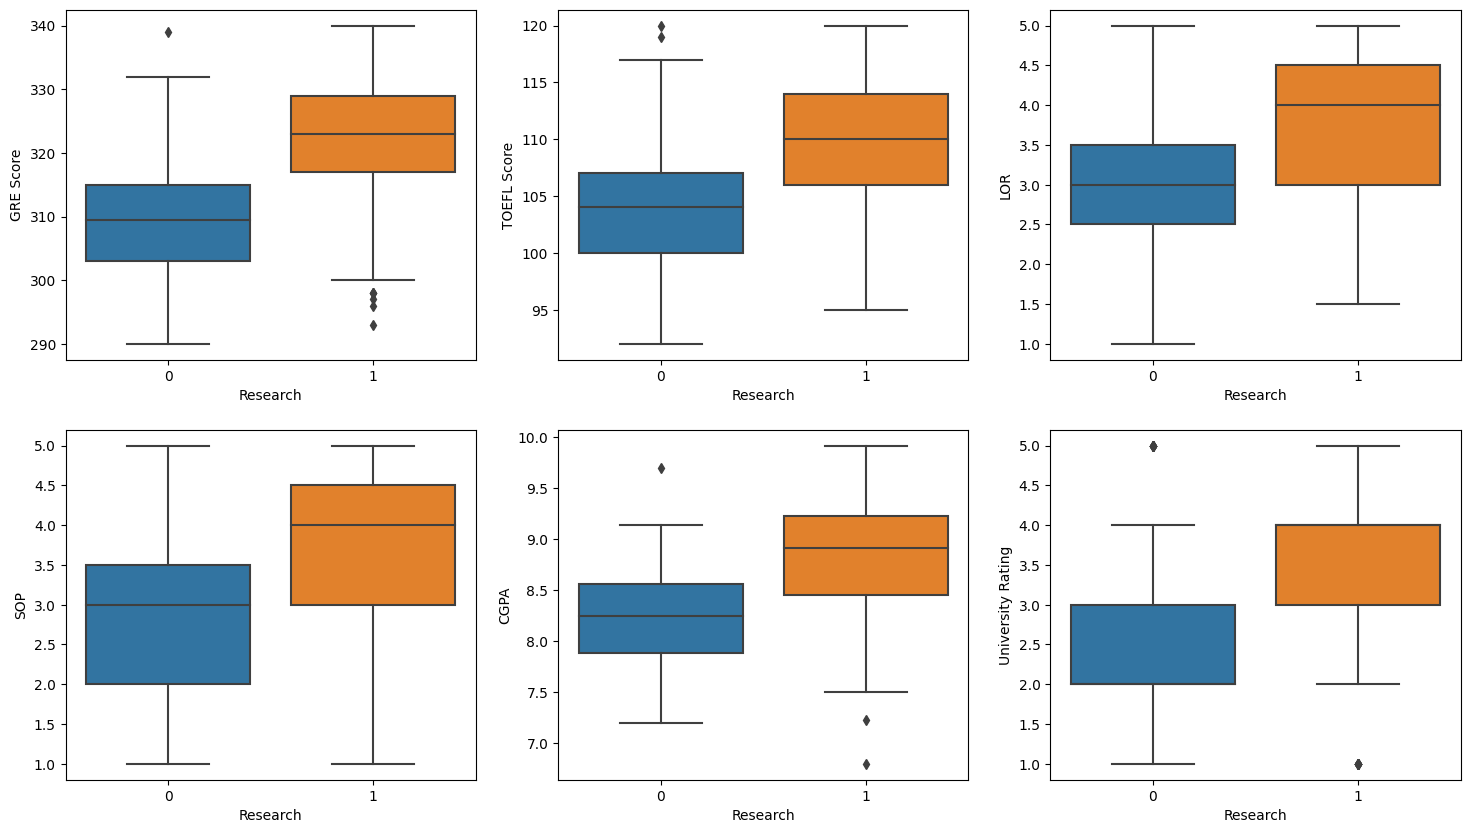

In [38]:
# Bivariate analysis 

# Range of every column for Research 

fig, axes = plt.subplots(2, 3, figsize= (18, 10))
sns.boxplot(ax=axes[0, 0], data=df, x='Research', y='GRE Score', )
sns.boxplot(ax=axes[0, 1], data=df, x='Research', y='TOEFL Score')
sns.boxplot(ax=axes[0, 2], data=df, x='Research', y='LOR')
sns.boxplot(ax=axes[1, 0], data=df, x='Research', y='SOP')
sns.boxplot(ax=axes[1, 1], data=df, x='Research', y='CGPA')
sns.boxplot(ax=axes[1, 2], data=df, x='Research', y='University Rating')

plt.show()

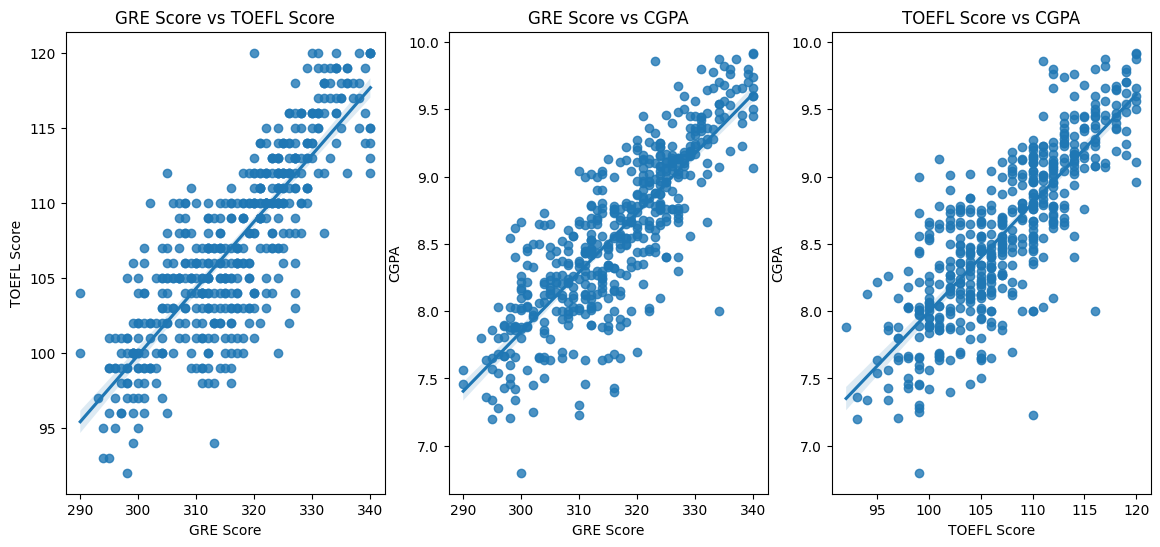

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Multivariate analysis
# sns regplot with 3 variables Gre Score, TOEFL Score, and CGPA
# make these three different regplots in 3 different subplots

fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# Corrected indexing for axes
sns.regplot(ax=axes[0], x="GRE Score", y="TOEFL Score", data=df)
axes[0].set_title("GRE Score vs TOEFL Score")

sns.regplot(ax=axes[1], x="GRE Score", y="CGPA", data=df)
axes[1].set_title("GRE Score vs CGPA")

sns.regplot(ax=axes[2], x="TOEFL Score", y="CGPA", data=df)
axes[2].set_title("TOEFL Score vs CGPA")

plt.show()

In [48]:
df['Chance_of_Admit'] = df['Chance of Admit'] 

df = df.drop('Chance of Admit', axis=1)

df.head() 

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


***
***
## **1. Checking Linearity of variables**

In [49]:
label = df[['Chance_of_Admit']]
features = df.drop('Chance_of_Admit', axis=1) 

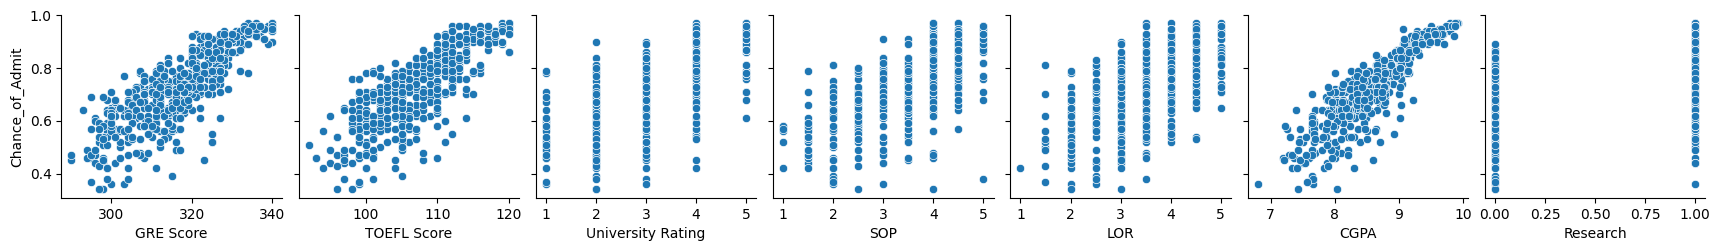

In [50]:
sns.pairplot(data=df, x_vars=features.columns, y_vars=label.columns);

***
***
## **2. Checking Multicolinearity in data.**

In [51]:
def vif_pruning(features, vif_threshold):
    vifs = []
    columns = []
    result = []
    feature_columns = features.columns
    for column in feature_columns:
        if len(features.columns) <=1:
            vifs += [0]
            columns += [column]
            result += ["Keeping column"]
            break
        vif = round(variance_inflation_factor(features.values, features.columns.get_loc(column)), 2)
        vifs += [vif]
        columns += [column]
        if vif > vif_threshold:
            # features = features.drop(column, axis=1)
            result += ["Dropping column"]
        else:
            result += ["Keeping column"]
    return features, pd.DataFrame({'VIF Score':vifs, 'Column Name':columns, 'Result':result})


features, vif_df = vif_pruning(features, 10) 

In [53]:
print(vif_df)


   VIF Score        Column Name           Result
0    1308.06          GRE Score  Dropping column
1    1215.95        TOEFL Score  Dropping column
2      20.93  University Rating  Dropping column
3      35.27                SOP  Dropping column
4      30.91                LOR  Dropping column
5     950.82               CGPA  Dropping column
6       2.87           Research   Keeping column


***
***
## **3. Checking mean of residuals.**

In [55]:
features = sm.add_constant(features)
features.head()

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.0,337,118,4,4.5,4.5,9.65,1
1,1.0,324,107,4,4.0,4.5,8.87,1
2,1.0,316,104,3,3.0,3.5,8.00,1
3,1.0,322,110,3,3.5,2.5,8.67,1
4,1.0,314,103,2,2.0,3.0,8.21,0


In [56]:
model = sm.OLS(label, features)
model_result = model.fit()
print(f'Mean of the residuals is {round(model_result.resid.mean(), 2)}')

Mean of the residuals is -0.0


***
***
## **4. Checking Normality of residuals.**

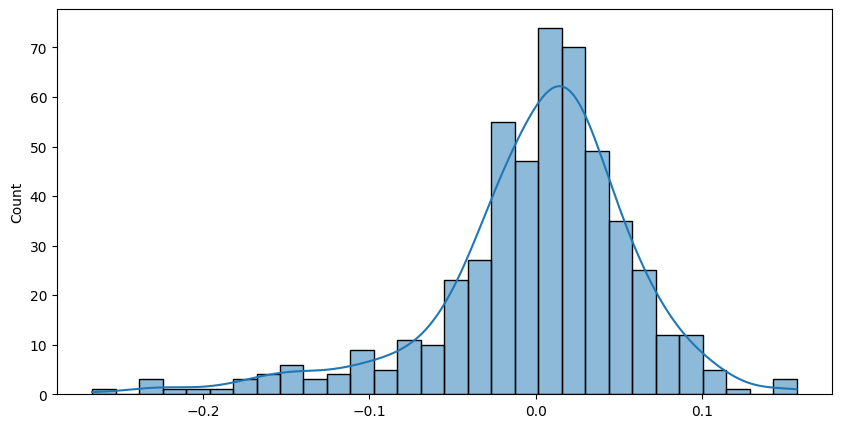

In [59]:
fig, axes = plt.subplots(figsize=(10,5))
sns.histplot(model_result.resid, kde=True);

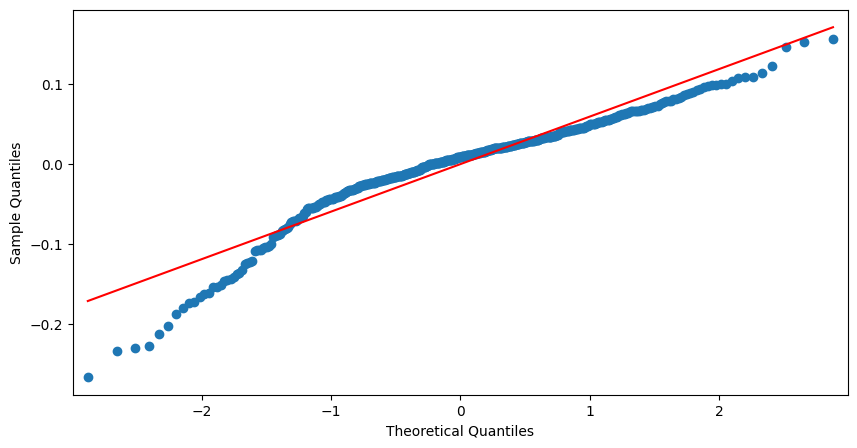

In [60]:
fig, axes = plt.subplots(figsize=(10,5))
sm.qqplot(model_result.resid, line='s', ax=axes);

***
***
## **15. Checking for Homoskedasticity and patterns in residual plot.**

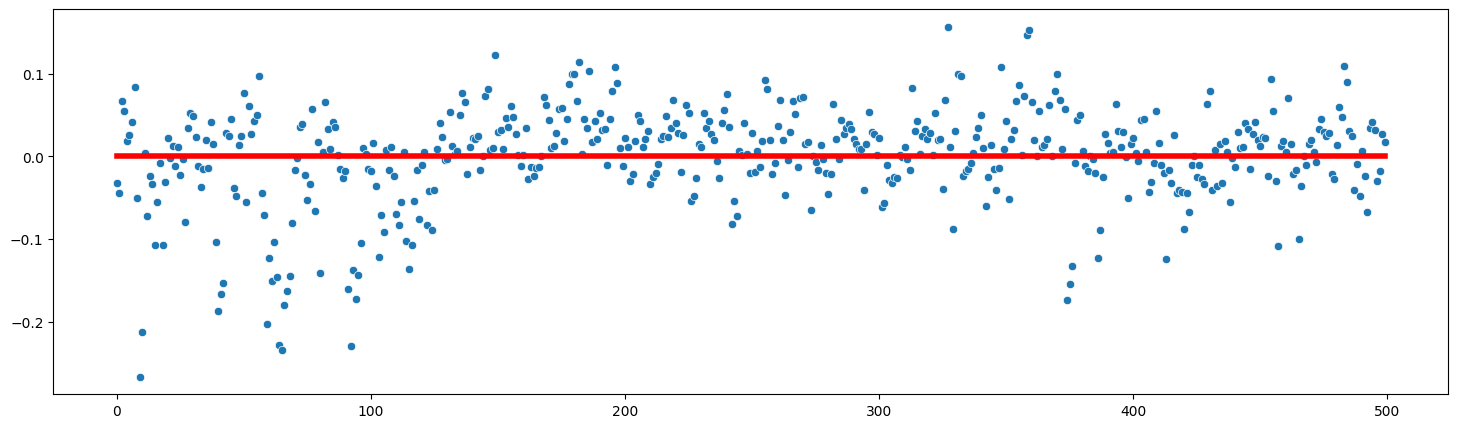

In [62]:
fig, axes = plt.subplots(figsize=(18,5))
sns.lineplot(x=model_result.resid.index, y=[0 for x in model_result.resid], color='r', linewidth=4)
sns.scatterplot(x=model_result.resid.index, y=model_result.resid);

***
***
## **1.Model training**

In [63]:
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=0, train_size = .7)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     241.6
Date:                Thu, 25 Jan 2024   Prob (F-statistic):          3.13e-128
Time:                        02:40:15   Log-Likelihood:                 496.03
No. Observations:                 350   AIC:                            -976.1
Df Residuals:                     342   BIC:                            -945.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3440      0.12

In [64]:
def evaluate_model(model, X_test, y_test): 
    y_pred = model.predict(X_test)
    print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score: ", r2_score(y_test, y_pred))

In [65]:
evaluate_model(model, X_test, y_test)

Mean Absolute Error:  0.04534771104286234
Mean Squared Error:  0.003812849086980032
Root Mean Squared Error:  0.06174827193517266
R2 Score:  0.7910195074277867


***
***
## **2. Performing Ridge Regression.**

In [68]:
features_columns = features.columns[1:]
label = df[['Chance_of_Admit']]
features = df[features_columns]
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=0, train_size = .7)
for alpha in [0.1, 0.2, 0.5, 1.0]:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    print(f"\n\n==============================================================================\n\
                       Model Performance with Alpha value {alpha}.\n"+
                "==============================================================================\n", 
          evaluate_model(model, X_test, y_test))

Mean Absolute Error:  0.04534676156155215
Mean Squared Error:  0.0038128653462492124
Root Mean Squared Error:  0.06174840359271819
R2 Score:  0.7910186162647732


                       Model Performance with Alpha value 0.1.
 None
Mean Absolute Error:  0.045345801239913545
Mean Squared Error:  0.0038129150372805723
Root Mean Squared Error:  0.06174880595833876
R2 Score:  0.7910158927223583


                       Model Performance with Alpha value 0.2.
 None
Mean Absolute Error:  0.045347575463019506
Mean Squared Error:  0.0038132569234833784
Root Mean Squared Error:  0.061751574259150496
R2 Score:  0.7909971540979239


                       Model Performance with Alpha value 0.5.
 None
Mean Absolute Error:  0.04535664052324548
Mean Squared Error:  0.003814425444050089
Root Mean Squared Error:  0.06176103499820974
R2 Score:  0.7909331080268518


                       Model Performance with Alpha value 1.0.
 None


***
***
## **3. Performing Lasso Regression.**

In [69]:
label = df[['Chance_of_Admit']]
features = df[features_columns]
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=0, train_size = .7)
for alpha in [0.1, 0.2, 0.5, 1.0]:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    print(f"\n\n==============================================================================\n\
                       Model Performance with Alpha value {alpha}.\n"+
                "==============================================================================\n", 
          evaluate_model(model, X_test, y_test))

Mean Absolute Error:  0.059252661737449905
Mean Squared Error:  0.006548542733861643
Root Mean Squared Error:  0.08092306676011261
R2 Score:  0.6410774056529656


                       Model Performance with Alpha value 0.1.
 None
Mean Absolute Error:  0.0633656996445613
Mean Squared Error:  0.007371959096982428
Root Mean Squared Error:  0.08586011353930548
R2 Score:  0.5959463361478528


                       Model Performance with Alpha value 0.2.
 None
Mean Absolute Error:  0.06941825767766045
Mean Squared Error:  0.008537333059653438
Root Mean Squared Error:  0.09239768968785658
R2 Score:  0.5320727289858351


                       Model Performance with Alpha value 0.5.
 None
Mean Absolute Error:  0.09022218659931104
Mean Squared Error:  0.013361827874851538
Root Mean Squared Error:  0.11559337297116794
R2 Score:  0.2676444025841854


                       Model Performance with Alpha value 1.0.
 None


***
***

## **4.Model Training**

In [70]:
y = df['Chance_of_Admit'] 
df.drop(['Chance_of_Admit'], axis= 1, inplace= True) 
X = df 

In [71]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

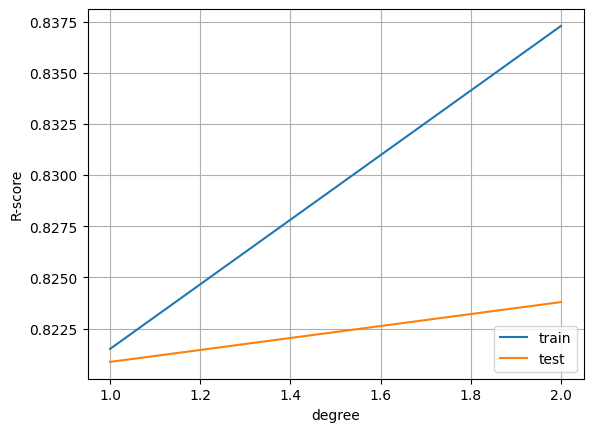

In [72]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
max_degree = 3 # max polynomial degree
train_scores = []
test_scores = []
scaler = StandardScaler()
for degree in range(1, max_degree):
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
    polyreg_scaled.fit(X_train, y_train)
    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    
plt.figure()
plt.plot(list(range(1, 3)), train_scores, label="train")
plt.plot(list(range(1, 3)), test_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("R-score")
plt.grid()
plt.show()

In [73]:
from sklearn.linear_model import Ridge
train_scores = []
test_scores = []
scaler = StandardScaler()
for alpha in range(1,100):
  polyreg_scaled = make_pipeline(PolynomialFeatures(1), scaler, Ridge(alpha))
  polyreg_scaled.fit(X_train, y_train)
  train_score = polyreg_scaled.score(X_train, y_train)
  test_score = polyreg_scaled.score(X_test, y_test)
  train_scores.append(train_score)
  test_scores.append(test_score)

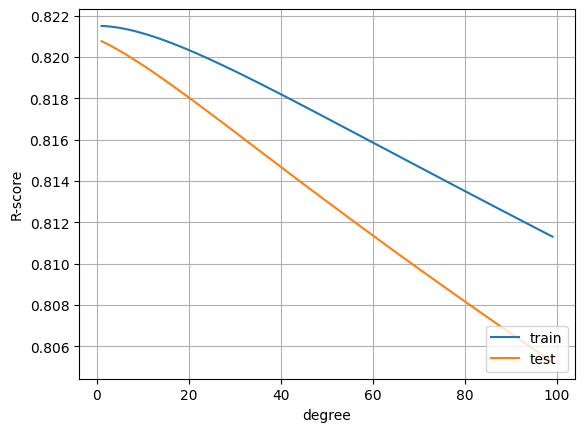

In [74]:
plt.figure()
plt.plot(list(range(1, 100)), train_scores, label="train")
plt.plot(list(range(1, 100)), test_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("R-score")
plt.grid()
plt.show() 

In [75]:
polyreg_scaled = make_pipeline(PolynomialFeatures(1), scaler, Ridge(2))
polyreg_scaled.fit(X_train, y_train)
train_score = polyreg_scaled.score(X_train, y_train)
print(train_score)
Test_score = polyreg_scaled.score(X_test, y_test)
print(Test_score) 

0.8214921873868161
0.8206587772715342


***
***

## **5.Model Training using scikit learn pipeline**

In [85]:
# Read the dataset
df = pd.read_csv('artifacts/data_ingestion/Jamboree_Admission.csv')
df.drop(['Serial No.'], axis= 1, inplace= True)
df.columns = [col.strip() for col in df.columns]
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [86]:
# check all the unique values in University Rating column
print(df['University Rating'].unique())
# Ordinal coding for University Rating column
df['University Rating'] = df['University Rating'].map({1:'Low', 2:'Low', 3:'Medium', 4:'High', 5:'High'}) 

df['Research'] = df['Research'].astype('object')

df.info()

[4 3 2 5 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    object 
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    object 
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 31.4+ KB


In [87]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,High,4.5,4.5,9.65,1,0.92
1,324,107,High,4.0,4.5,8.87,1,0.76
2,316,104,Medium,3.0,3.5,8.00,1,0.72
3,322,110,Medium,3.5,2.5,8.67,1,0.80
4,314,103,Low,2.0,3.0,8.21,0,0.65


In [101]:
# code for random forest regressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder


# make sklearn pipeline for preprocessing and model building 
# define pipeline

numerical_features = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA'] 

categorical_features = ["Research"] 

ordinal_features = ['University Rating']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
]) 

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Use 'most_frequent' for mode imputation
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
]) 
# Write steps for ordinal encoder


# Bundle preprocessing for numerical and categorical data

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', OneHotEncoder(), categorical_features),
        ('ord', OrdinalEncoder(categories=[['Low', 'Medium', 'High']]), ordinal_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# split data into train and test set
target = df[['Chance of Admit']]
features = df.drop('Chance of Admit', axis=1) 
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0, train_size = .8)  

# convert y_train and y_test to 1-dimensional arrays (vector)

y_train = y_train['Chance of Admit'].values.ravel()
y_test = y_test['Chance of Admit'].values.ravel()
# fit and transform the pipeline with training data


In [102]:
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [103]:

# define the models and parameters for grid search

model_params = {
    'random_forest': {
        'model': RandomForestRegressor(),
        'params' : {
            'n_estimators': [100, 200, 500, 1000],
            'max_features': ['sqrt', 'log2'],
            'max_depth' : [4,5,6,7,8],
            'bootstrap': [True, False], 
            'criterion' :['friedman_mse', 'squared_error']
        }
    }, 

    'gradient_boosting': {
        'model': GradientBoostingRegressor(),
        'params' : {
            'n_estimators': [100, 200, 500, 1000],
            'max_features': ['sqrt', 'log2'],
            'max_depth' : [4,5,6,7,8],
            'criterion' :['friedman_mse', 'squared_error'],
            'learning_rate': [0.001, 0.01, 0.1, 1]
        }
    }
}

# define grid search function 

def grid_search(X_train, y_train, model_params, cv=5, n_jobs=-1, verbose=3): 
    scores = []
    cv = KFold(n_splits=cv, shuffle=True, random_state=0)
    for model_name, mp in model_params.items():
        clf =  RandomizedSearchCV(mp['model'], mp['params'], cv=cv, n_jobs=n_jobs, verbose=verbose, scoring= 'r2')
        clf.fit(X_train, y_train)
        scores.append({
            'model': model_name,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_
        })
    return scores  


# call grid search function

grid_search(X_train, y_train, model_params, cv=5, n_jobs=-1, verbose=3) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=False, criterion=squared_error, max_depth=6, max_features=log2, n_estimators=200;, score=0.798 total time=   0.3s
[CV 3/5] END bootstrap=False, criterion=squared_error, max_depth=6, max_features=log2, n_estimators=200;, score=0.749 total time=   0.3s
[CV 2/5] END bootstrap=False, criterion=squared_error, max_depth=6, max_features=log2, n_estimators=200;, score=0.781 total time=   0.3s
[CV 1/5] END bootstrap=True, criterion=friedman_mse, max_depth=7, max_features=log2, n_estimators=100;, score=0.809 total time=   0.1s
[CV 5/5] END bootstrap=False, criterion=squared_error, max_depth=6, max_features=log2, n_estimators=200;, score=0.832 total time=   0.2s
[CV 4/5] END bootstrap=False, criterion=squared_error, max_depth=6, max_features=log2, n_estimators=200;, score=0.844 total time=   0.2s
[CV 2/5] END bootstrap=True, criterion=friedman_mse, max_depth=7, max_features=log2, n_estimators=100;, score=0.796 tot

[{'model': 'random_forest',
  'best_score': 0.8126511912170944,
  'best_params': {'n_estimators': 1000,
   'max_features': 'log2',
   'max_depth': 5,
   'criterion': 'squared_error',
   'bootstrap': True}},
 {'model': 'gradient_boosting',
  'best_score': 0.7835289168285986,
  'best_params': {'n_estimators': 100,
   'max_features': 'sqrt',
   'max_depth': 8,
   'learning_rate': 0.1,
   'criterion': 'friedman_mse'}}]

In [96]:
def evaluate_model(model, X_test, y_test): 
    y_pred = model.predict(X_test)
    print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score: ", r2_score(y_test, y_pred)) 

In [119]:
model_G = GradientBoostingRegressor(criterion='friedman_mse', learning_rate=0.01, max_depth=4, max_features='sqrt', n_estimators=200)
model_G.fit(X_train, y_train)
evaluate_model(model_G, X_train, y_train)  
print("*"*50) 

evaluate_model(model_G, X_test, y_test) 

Mean Absolute Error:  0.039272237463219506
Mean Squared Error:  0.0027279960119869244
Root Mean Squared Error:  0.05223022125156014
R2 Score:  0.8660718270906738
**************************************************
Mean Absolute Error:  0.04639484263927688
Mean Squared Error:  0.004146518375573334
Root Mean Squared Error:  0.06439346531732341
R2 Score:  0.7625778567930641


In [111]:
model_R = RandomForestRegressor(bootstrap=True, criterion='squared_error', max_depth=5, max_features='log2', n_estimators=1000)
model_R.fit(X_train, y_train)
evaluate_model(model_R, X_train, y_train)
print("*"*50)
evaluate_model(model_R, X_test, y_test)  


Mean Absolute Error:  0.03386405938604197
Mean Squared Error:  0.0022894601177006206
Root Mean Squared Error:  0.047848303185177014
R2 Score:  0.8876012981085382
**************************************************
Mean Absolute Error:  0.0439897564394004
Mean Squared Error:  0.003911215450082567
Root Mean Squared Error:  0.06253971098496192
R2 Score:  0.7760508767613298
